# Discussion 13: Heavyball, Steepest Descent w/ Momentum

In this discussion, we will explore
* Heavyball/momentum method

---

We've studied many algorithms, but most of these methods **require too much computation per iteration to be useful for very large functions**. So the simplest (and least efficient method) of **fixed step steepest descent** is usually used.

The **Heavy ball** method is another method similar to steepest descent that typically performs better.

## The "Heavyball" Method

We have shown many examples of how steepest descent may take many thousands of iterations to converge even for relatively simple functions. One specific example of where steepest descent struggles is for quadratic functions where one variable is "scaled" much more than the other. Take the function

$$ f(x,y) = x^2 + 10y^2 $$

with $\mathbf{x}_0=(10,1)$ and $\alpha_k$ chosen by exact line search. Recall that for quadratic functions, the optimal value of $\alpha_k=\frac{\|\nabla f_k\|^2}{\|\nabla f_k\|_Q^2}$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

After 52 iterations, approximate minimum is 9.501111404214848e-08 at [2.93894097e-04 2.93894097e-05]


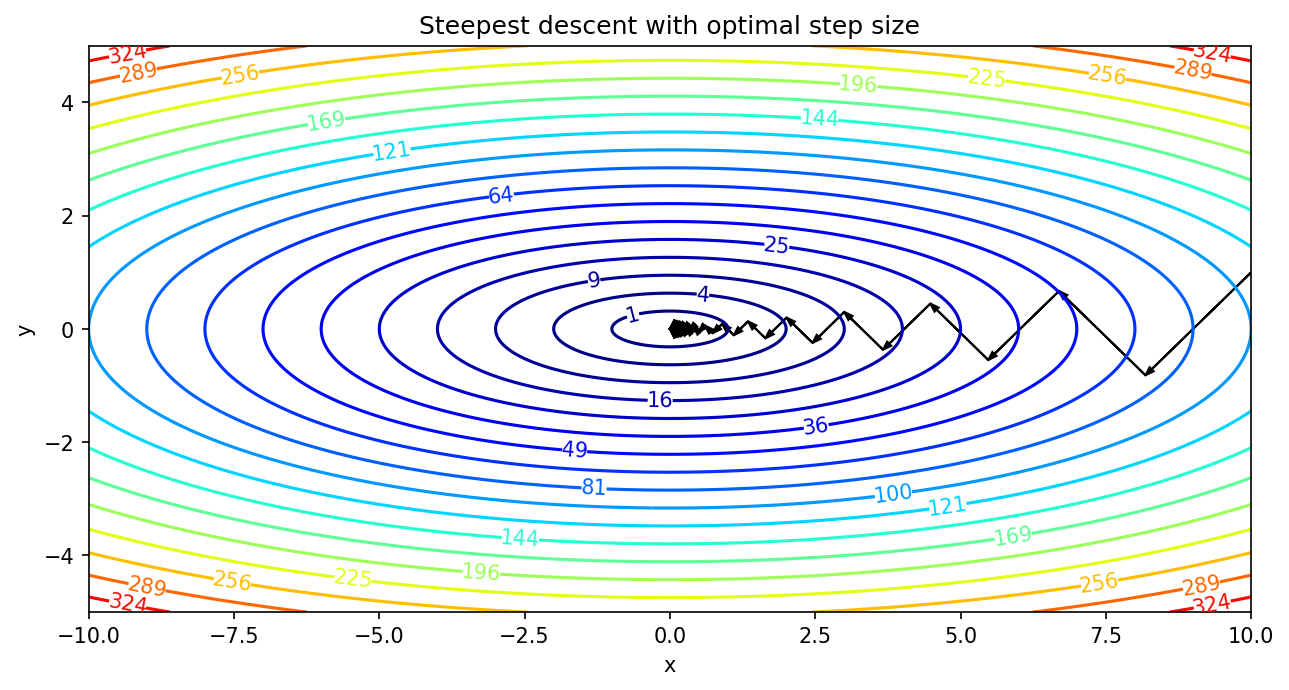

In [9]:
f = lambda x,y: x**2 + 10*y**2
df = lambda x,y: np.array([2*x, 20*y])
Q = np.array([[2,0],[0,20]])

plt.figure(figsize=(10, 5), dpi=150)
X = np.linspace(-10,10,300)
Y = np.linspace(-5,5,300)
Xmesh, Ymesh = np.meshgrid(X,Y)
Z = f(Xmesh,Ymesh)
CS = plt.contour(Xmesh, Ymesh, Z, np.arange(1,20)**2, cmap='jet')
plt.clabel(CS,inline_spacing=0,fmt='%d')
plt.axis([-10,10,-5,5])
plt.xlabel('x')
plt.ylabel('y')

x = np.array([10,1])
tol = 1e-3
max_steps = 1000
dx = df(x[0],x[1])
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    alpha = (dx@dx)/(dx@(Q@dx))   # optimal step size
    xnew = x - alpha*dx
    plt.arrow(x[0],x[1],-alpha*dx[0],-alpha*dx[1],color='k', head_width=.1,length_includes_head=True)
    x = xnew
    i += 1
    dx = df(x[0],x[1])

print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')
plt.title('Steepest descent with optimal step size')
plt.show()

We see above that the steps of steepest descent appear perpendicular to each other, and indeed this can be proven since if $\phi'(\alpha)=0$, we have

$$ 0 = \phi'(\alpha) = \frac{d}{d\alpha}\big(f(\mathbf{x}_k - \alpha\nabla f_k)\big) = \nabla f_k^T\nabla f(\mathbf{x}_k - \alpha\nabla f_k) = \nabla f_k^T\nabla f_{k+1} = \mathbf{p}_k^T\mathbf{p}_{k+1}$$

and thus $\mathbf{p}_k$ and $\mathbf{p}_{k+1}$ are orthogonal. Since successive updates are orthogonal, every other update is essentially moving in the same direction, even though it is proven not to result in much decrease. In fact, the situation is worse if we fall back on choosing a fixed value of $\alpha$, in which case we see *extreme* oscillation:

After 491 iterations, approximate minimum is 2.4210643345392394e-08 at [ 8.90460845e-47 -4.92043122e-05]


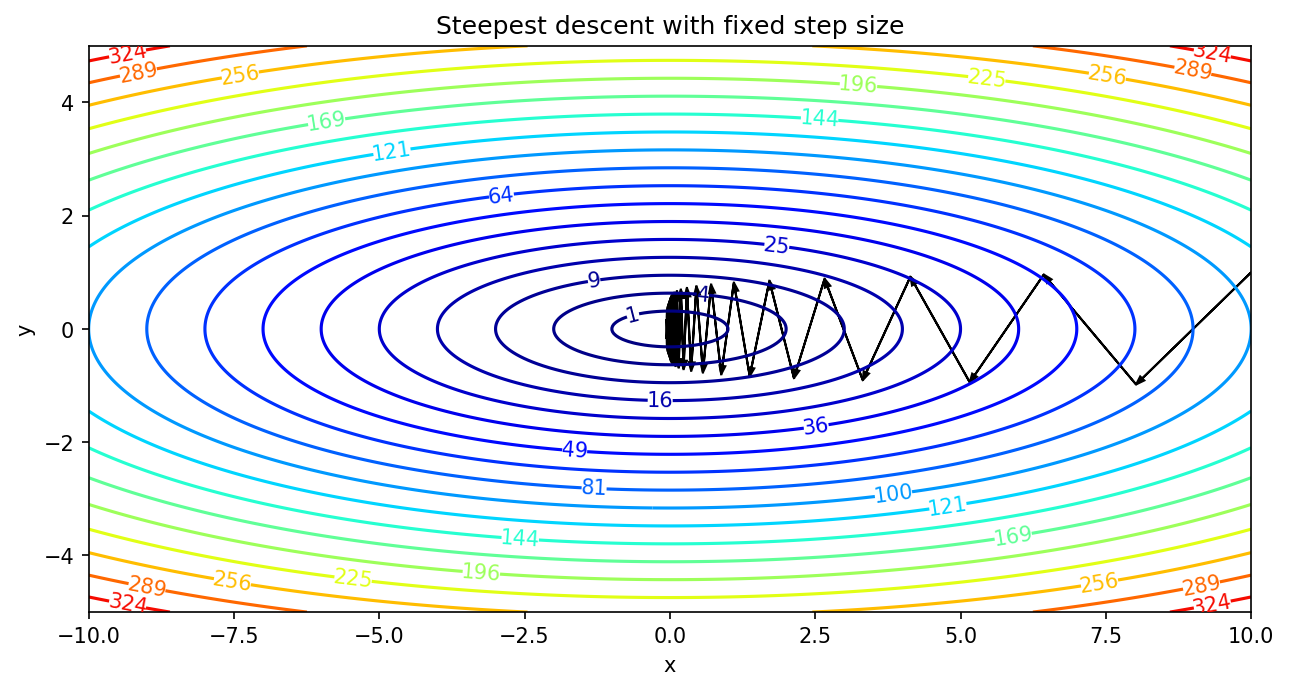

In [3]:
plt.figure(figsize=(10, 5), dpi=150)
X = np.linspace(-10,10,300)
Y = np.linspace(-5,5,300)
Xmesh, Ymesh = np.meshgrid(X,Y)
Z = f(Xmesh,Ymesh)
CS = plt.contour(Xmesh, Ymesh, Z, np.arange(1,20)**2, cmap='jet')
plt.clabel(CS,inline_spacing=0,fmt='%d')
plt.axis([-10,10,-5,5])
plt.xlabel('x')
plt.ylabel('y')

x = np.array([10,1])
tol = 1e-3
max_steps = 100
0
dx = df(x[0],x[1])
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    alpha = .099   # fixed step size just under 0.1
    xnew = x - alpha*dx
    plt.arrow(x[0],x[1],-alpha*dx[0],-alpha*dx[1],color='k', head_width=.1,length_includes_head=True)
    x = xnew
    i += 1
    dx = df(x[0],x[1])

print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')
plt.title('Steepest descent with fixed step size')
plt.show()

**Above visual is with fixed step size**: These steps are not orthogonal to each other, but they are exhibiting the same oscillating behavior, forming acute angles which slowly oscillate towards the minimizer.

It would be nice if the iteration had some kind of "memory" of where it has been to avoid making the same mistakes multiple times. This is one big motivation behind the **heavyball method**, also referred to as **steepest descent with momentum**. The heavyball iteration is defined by the following:

$$ \begin{align*}
    \mathbf{p}_k &= \nabla f_k \color{red}{+ \beta \mathbf{p}_{k-1}} \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k - \alpha\mathbf{p}_k
\end{align*} $$

where $\beta\in[0,1]$ is called the *momentum parameter*. This update should look very familiar, as it is just the conjugate gradient update with a fixed $\beta$. In some sense, we can think of heavyball as somewhere in between steepest descent and conjugate gradient: heavyball attempts to force the new directions to be different than previous ones but doesn't go so far as requiring any kind of conjugacy. We should thus probably expect results somewhere in between steepest descent and conjugate gradient as well. Indeed we investigate below the same problem from above using the parameter $\beta=0.2$, first choosing the optimal step size, then choosing the same fixed step size as before:

After 20 iterations, approximate minimum is 2.2173144022114153e-07 at [-4.70694998e-04  4.21496326e-06]


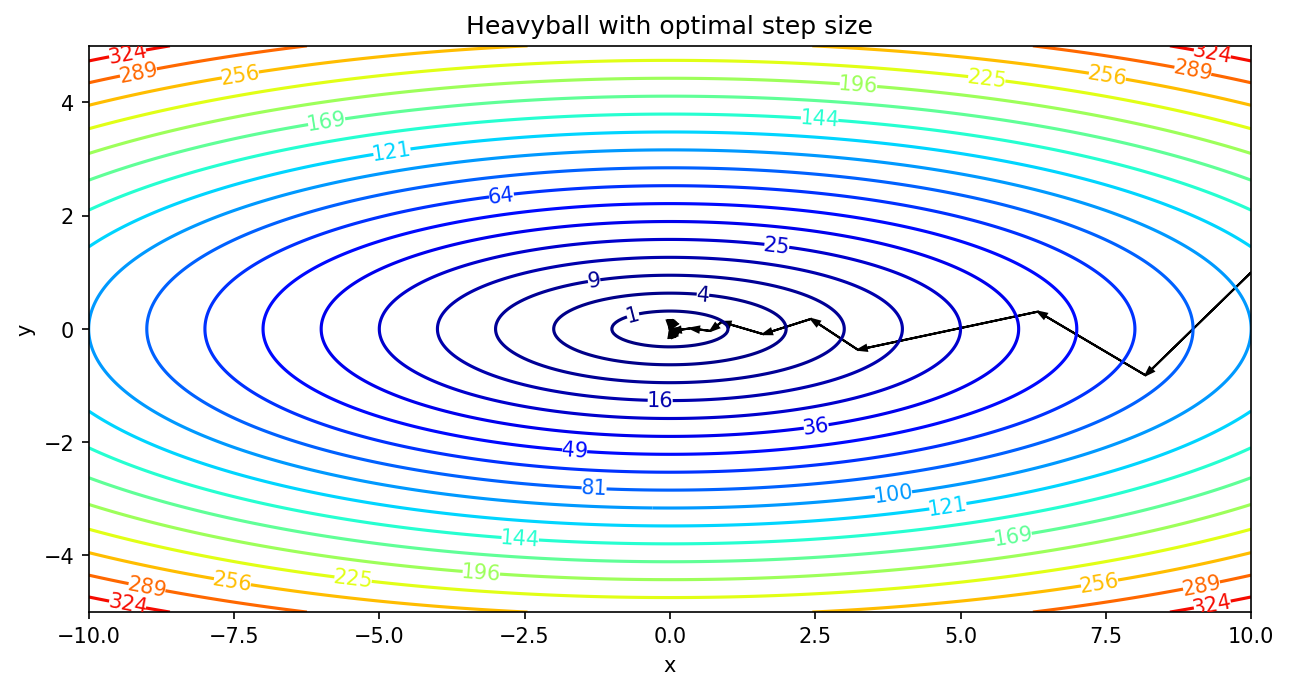

In [10]:
plt.figure(figsize=(10, 5), dpi=150)
X = np.linspace(-10,10,300)
Y = np.linspace(-5,5,300)
Xmesh, Ymesh = np.meshgrid(X,Y)
Z = f(Xmesh,Ymesh)
CS = plt.contour(Xmesh, Ymesh, Z, np.arange(1,20)**2, cmap='jet')
plt.clabel(CS,inline_spacing=0,fmt='%d')
plt.axis([-10,10,-5,5])
plt.xlabel('x')
plt.ylabel('y')

x = np.array([10,1])
tol = 1e-3
beta = 0.2    # momentum parameter
max_steps = 1000
dx = df(x[0],x[1])
pk = dx*0      # first update is just gradient descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    alpha = (dx@dx)/(dx@(Q@dx))   # optimal step size
    pk = dx + beta*pk
    xnew = x - alpha * pk
    plt.arrow(x[0],x[1],xnew[0]-x[0],xnew[1]-x[1],color='k', head_width=.1,length_includes_head=True)
    x = xnew
    i += 1
    dx = df(x[0],x[1])

print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')
plt.title('Heavyball with optimal step size')
plt.show()

After 32 iterations, approximate minimum is 1.8431654293980042e-07 at [ 4.29321026e-04 -1.59736232e-11]


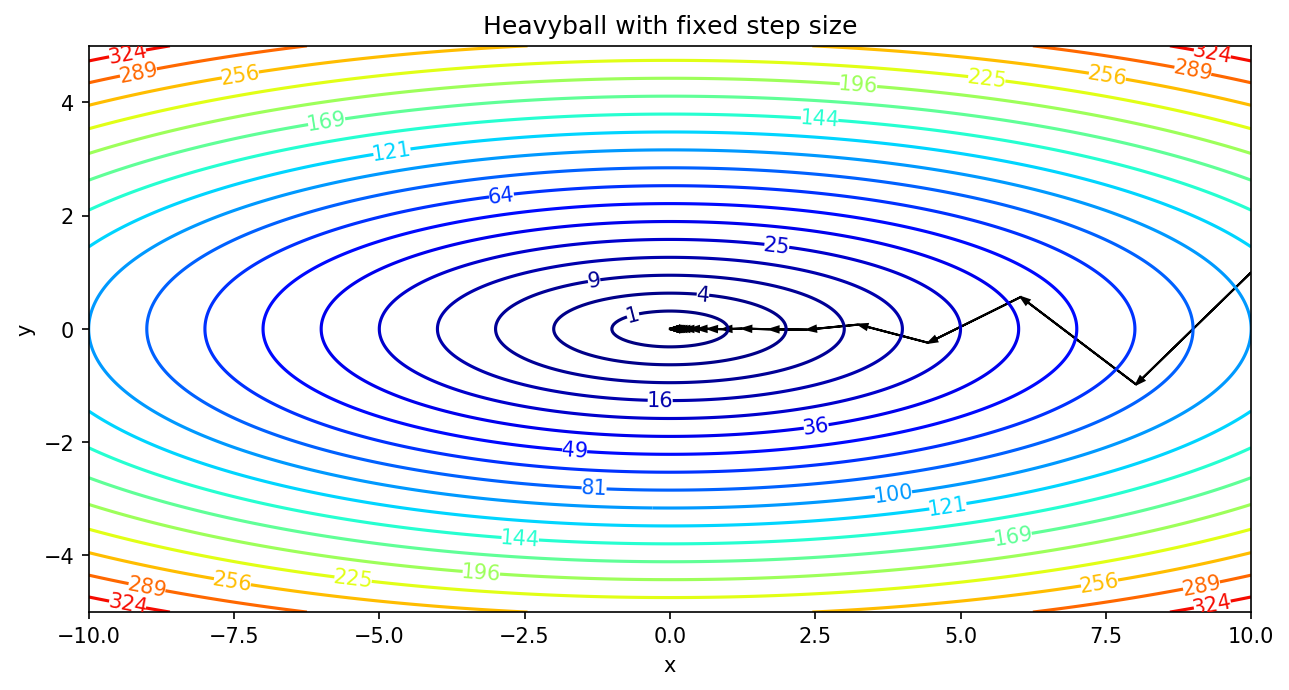

In [5]:
plt.figure(figsize=(10, 5), dpi=150)
X = np.linspace(-10,10,300)
Y = np.linspace(-5,5,300)
Xmesh, Ymesh = np.meshgrid(X,Y)
Z = f(Xmesh,Ymesh)
CS = plt.contour(Xmesh, Ymesh, Z, np.arange(1,20)**2, cmap='jet')
plt.clabel(CS,inline_spacing=0,fmt='%d')
plt.axis([-10,10,-5,5])
plt.xlabel('x')
plt.ylabel('y')

x = np.array([10,1])
tol = 1e-3
beta = 0.2    # momentum parameter
max_steps = 1000
dx = df(x[0],x[1])
pk = dx*0      # first update is just gradient descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    alpha = .099   # fixed step size
    pk = dx + beta*pk
    xnew = x - alpha * pk
    plt.arrow(x[0],x[1],xnew[0]-x[0],xnew[1]-x[1],color='k', head_width=.1,length_includes_head=True)
    x = xnew
    i += 1
    dx = df(x[0],x[1])

print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')
plt.title('Heavyball with fixed step size')
plt.show()

The reason this is often called steepest descent *with momentum* is if two consecutive updates are in basically the same direction, this algorithm will move more quickly in that direction to try to reach the minimum faster. If the previous update was in a direction opposite to the current one, it has the effect of backing off and preventing overshooting or oscillation. The following image demonstrates the idea pictorially:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/03/07130330/momentum.png" width=30% />

For a great interactive animation of momentum (as well as a great explainer), see [here](https://distill.pub/2017/momentum/).

### Quadratic functions, eigenvectors

The quadratic example: If $f(\mathbf{x}) = 1/2 \mathbf{x}^T Q \mathbf{x}$ and $\nabla f(\mathbf{x}) = Q \mathbf{x}$, then we'll have $\mathbf{x}_k = c_k \mathbf{q}$, $\mathbf{p}_k = d_k \mathbf{q}$.

We eventually show that the best fixed step size and $\beta$ are:

$$\alpha = \frac{4}{(\lambda_{\min}^{1/2} + \lambda_{\max}^{1/2})^2}$$

$$\beta = \frac{(\lambda_{\min}^{1/2} - \lambda_{\max}^{1/2})^2}{(\lambda_{\min}^{1/2} + \lambda_{\max}^{1/2})^2}$$

This difference can be seen in the following code: If alpha, bet are optimal, then we converge in fewer iterations.

In [13]:
Q = np.array([[9,1],[1,4]])
b = np.array([0,0])
eigenvalues, eigenvectors = np.linalg.eig(Q)
x0 = eigenvectors[:,0]
f = lambda x: 1/2 * x @ Q @ x - b @ x
df = lambda x: Q @ x - b

x = np.array(x0)
tol = 1e-3
alpha = .2
beta = 0.2    # momentum parameter

# If alpha, beta are optimal:
alpha = 4 / (np.sqrt(eigenvalues[0]) + np.sqrt(eigenvalues[1]))**2
beta = (np.sqrt(eigenvalues[0]) - np.sqrt(eigenvalues[1]))**2 / (np.sqrt(eigenvalues[0]) + np.sqrt(eigenvalues[1]))**2


max_steps = 1000
dx = df(x)
pk = dx*0      # first update is just gradient descent
i=0
path = [x]
pks = [pk]
while np.linalg.norm(dx)>tol and i<max_steps:
    # alpha = (dx@dx)/(dx@(Q@dx))   # optimal step size

    pk = dx + beta*pk
    xnew = x - alpha * pk
    path.append(xnew)
    pks.append(pk)
    x = xnew
    i += 1
    dx = df(x)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')

After 11 iterations, approximate minimum is 4.118412547963356e-08 at [-9.29508478e-05 -1.79006977e-05]


Looking at the path,

In [12]:
print(path)
print([p[0] / p[1] for p in path])
print("The ratio between the 1st and 2nd component of all vectors is the same, indicating that they're all multiples of q")

[array([0.98195639, 0.18910752]), array([-0.47207986, -0.09091427]), array([0.15857208, 0.03053819]), array([-0.04657507, -0.00896954]), array([0.01274323, 0.00245412]), array([-0.00333666, -0.00064258]), array([0.00084789, 0.00016329]), array([-2.10829403e-04, -4.06020332e-05]), array([5.15663367e-05, 9.93076906e-06])]
[5.192582403567252, 5.192582403567251, 5.192582403567254, 5.192582403567245, 5.192582403567262, 5.192582403567238, 5.192582403567266, 5.192582403567238, 5.192582403567264]
The ratio between the 1st and 2nd component of all vectors is the same, indicating that they're all multiples of q


### Convergence

Only touching on this since it's a topic for Wednesday, but to compare Gradient Descent vs Heavy Ball Method:

**Gradient Descent**:

With Gradient Descent, for $f(x) = 1/2 x^T Q x - b^T x$, $Q$ symmetric positive definite, the steepest descent $x_k \rightarrow x^* = Q^{-1} b$ if $\alpha_k \in (0, 2/\lambda_{\max}(Q))$.

For optimal constant step length $\alpha = \frac{2}{\lambda_{\max(Q)}+\lambda_{\min}(Q)}$:

$$\|x_{k+1} - x^*\| \le \frac{\kappa(Q) - 1}{\kappa(Q) + 1} \|x_k - x^*\|$$

Where $\kappa := \frac{\lambda_{\max}}{\lambda_{\min}}$. This allowed us to say that gradient descent is linear at worst, since this ratio is always less than 1.

**Heavy Ball Method**:

For Heavy Ball Method, we get a similar result for **strongly convex** and **strongly smooth** functions:

A function is **strongly convex** if
$$ f(\mathbf{y}) \ge f(\mathbf{x} + \nabla f(\mathbf{x})^T(\mathbf{y} - \mathbf{x}) + \frac{\mu}{2} \|\mathbf{y} - \mathbf{x}\|^2$$

A function is **strongly smoooth** if
$$ f(\mathbf{y}) \le f(\mathbf{x}) + \nabla f(\mathbf{x})^T (\mathbf{y} - \mathbf{x}) + \frac{L}{2} \| \mathbf{y} - \mathbf{x}\|^2$$

If $f$ is quadratic, you can let $L = \lambda_{\max}(Q)$, $\mu = \lambda_{\min}(Q)$.

For the same function, if Heavy Ball Method is applied with
$$\alpha = \frac{4}{(L^{1/2} + U^{1/2})^2}$$

$$\beta = \frac{(L^{1/2} - U^{1/2})^2}{(L^{1/2} + U^{1/2})^2}$$
Then $$\|x_{k+1}-x^* \| \le \left(\frac{L^{1/2} - U^{1/2}}{L^{1/2} + U^{1/2}}\right)^k \|x_0 -x^* \|$$

### Sample questions

1. Which of the following defines the update step for the heavyball method, assuming $\beta\in(0,1)?$
    * A. $\mathbf{x}_{k+1} = \mathbf{x} - \alpha_k \nabla f_k - \alpha_k\beta \mathbf{p}_{k-1}$
    * B. $\mathbf{x}_{k+1} = \mathbf{x} +\alpha_k \nabla f_k - \alpha_k\beta \mathbf{p}_{k-1}$
    * C. $\mathbf{x}_{k+1} = \mathbf{x} + \alpha_k \nabla f_k + \alpha_k\beta \mathbf{p}_{k-1}$
    * D. $\mathbf{x}_{k+1} = \mathbf{x} - \alpha_k \nabla f_k + \alpha_k\beta \mathbf{p}_{k-1}$

2. We minimize the function $f(x) = x^2 + 4y^2$ with steepest descent and optimal fixed step size.

  * a. What is the optimal fixed step size?
  * b. This iteration converges and satisfies the inequality
$$\|x_{k+1} - x^*\| \le L_{SD} \|x_{k} - x^*\|$$
What is $L_{SD}$ in this case?
  * c. What is the condition number of the matrix $Q
  
  
 3.
 * a. What are optimal values for $\alpha$ and $\beta$ when using Heavy ball method?
 * b.  This iteration converges and satisfies the inequality
 $$\|x_{k+1} - x^*\| \le (L_{HB})^k \|x_{k} - x^*\|$$
 What is $L_{HB}$ in this case?
 
 